In this file, will explore how to find the "brightness histogram" for each type of MRI. We are looking for clear humps that can make up a decent GMM model

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster

# Load data

In [4]:
sample_flair_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii"
sample_seg_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii"
sample_T1_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii"
sample_T1g_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1ce.nii"
sample_T2_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii"

In [7]:
data_flair, affine, im = load_nifti(sample_flair_path, return_img=True)

In [8]:
#FOR NOW, CAST AS ARRAY OF INTS (PROBABLY WANT FLOAT32 EVENTUALLY)
data_flair=data_flair.astype(np.int)

In [13]:
data_seg, affine, im = load_nifti(sample_seg_path, return_img=True)
data_seg=data_seg.astype(np.int)

In [14]:
data_T1, affine, im = load_nifti(sample_T1_path, return_img=True)
data_T1=data_T1.astype(np.int)

In [15]:
data_T1g, affine, im = load_nifti(sample_T1g_path, return_img=True)
data_T1g=data_T1g.astype(np.int)

In [16]:
data_T2, affine, im = load_nifti(sample_T2_path, return_img=True)
data_T2=data_T2.astype(np.int)

### Histogram for T1
Want 4 humps - background/CSF, gray matter, white matter, tumor

In [33]:
t1_flat = data_T1.flatten()

In [61]:
t1_flat.reshape(1, len(t1_flat))

memmap([[0, 0, 0, ..., 0, 0, 0]])

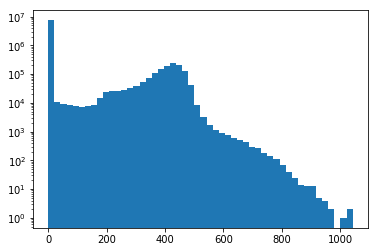

In [41]:
plt.figure()
plt.hist(t1_flat, bins=50, log=True)
plt.show()

Kmeans with k=4

In [64]:
t1_2D = t1_flat.reshape(len(t1_flat), 1) #kmeans needs 2d (vertical) matrix where each row is a datapoint
t1_kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit_predict(t1_2D)

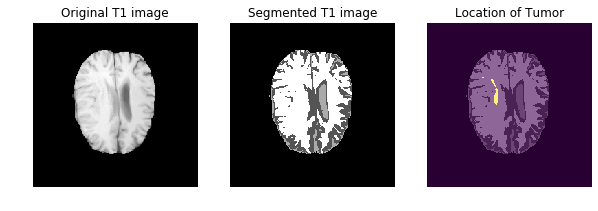

In [97]:
t1_kmeans_brain = t1_kmeans.reshape(240, 240, 155)
plt.figure(figsize=(10,5))
plt.subplot(1,3,1).set_axis_off()
plt.title("Original T1 image")
plt.imshow(data_T1[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,2).set_axis_off()
plt.title("Segmented T1 image")
plt.imshow(t1_kmeans_brain[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,3).set_axis_off()
plt.title("Location of Tumor")
plt.imshow(t1_kmeans_brain[:,:,100].T, cmap="gray", origin='lower')
plt.imshow(data_seg[:,:,100].T, alpha=0.6, origin='lower')


plt.show()

# Histogram for T2
Want 5 humps: gray matter, white matter, CSF, background, tumor

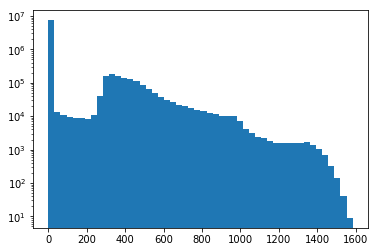

In [99]:
t2_flat = data_T2.flatten()
plt.figure()
plt.hist(t2_flat, bins=50, log=True)
plt.show()

kmeans with k=5

In [69]:
t2_2D = t2_flat.reshape(len(t2_flat), 1) #kmeans needs 2d (vertical) matrix where each row is a datapoint
t2_kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0).fit_predict(t2_2D)

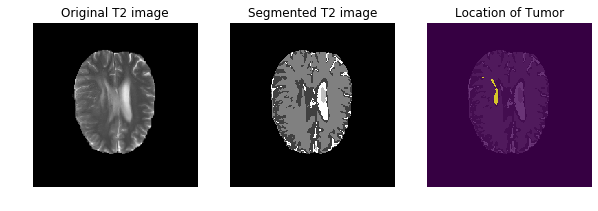

In [98]:
t2_flat = data_T2.flatten()
plt.figure(figsize=(10,5))

plt.subplot(1,3,1).set_axis_off()
plt.title("Original T2 image")
plt.imshow(data_T2[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,2).set_axis_off()
plt.title("Segmented T2 image")
plt.imshow(t2_kmeans_brain[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,3).set_axis_off()
plt.title("Location of Tumor")
plt.imshow(t2_kmeans_brain[:,:,100].T, cmap="gray", origin='lower')
plt.imshow(data_seg[:,:,100].T, alpha=0.8, origin='lower')
plt.show()

# Histogram of T1-gad
Want 5 humps: background, grey matter, white matter, blood (non-tumor), tumor

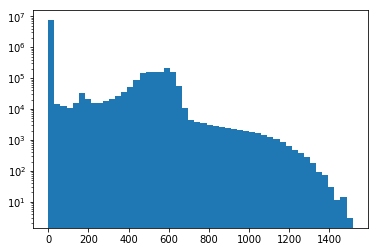

In [46]:
t1g_flat = data_T1g.flatten()
plt.figure()
plt.hist(t1g_flat, bins=50, log=True)
plt.show()

kmeans with 5 humps

In [90]:
t1g_2D = t1g_flat.reshape(len(t1g_flat), 1) #kmeans needs 2d (vertical) matrix where each row is a datapoint
t1g_kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0).fit_predict(t1g_2D)

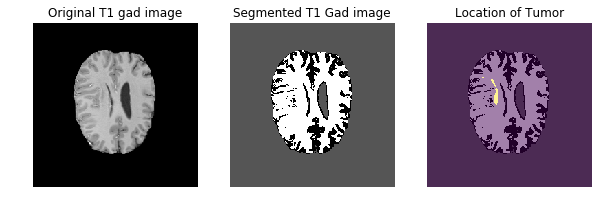

In [100]:
t1g_kmeans_brain = t1g_kmeans.reshape(240, 240, 155)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1).set_axis_off()
plt.title("Original T1 gad image")
plt.imshow(data_T1g[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,2).set_axis_off()
plt.title("Segmented T1 Gad image")
plt.imshow(t1g_kmeans_brain[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,3).set_axis_off()
plt.title("Location of Tumor")
plt.imshow(t1g_kmeans_brain[:,:,100].T, cmap="gray", origin='lower')
plt.imshow(data_seg[:,:,100].T, alpha=0.5, origin='lower')

plt.show()

# FLAIR histogram
Want 4 humps: background, grey matter, white matter, tumor

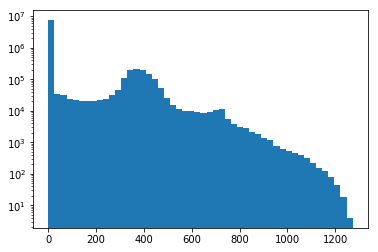

In [48]:
flair_flat = data_flair.flatten()
plt.figure()
plt.hist(flair_flat, bins=50, log=True)
plt.show()

In [92]:
flair_2D = flair_flat.reshape(len(flair_flat), 1) #kmeans needs 2d (vertical) matrix where each row is a datapoint
flair_kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit_predict(flair_2D)

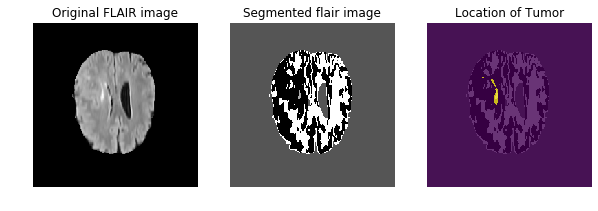

In [103]:
flair_kmeans_brain = flair_kmeans.reshape(240, 240, 155)
plt.figure(figsize=(10,5))

plt.subplot(1,3,1).set_axis_off()
plt.title("Original FLAIR image")
plt.imshow(data_flair[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,2).set_axis_off()
plt.title("Segmented flair image")
plt.imshow(flair_kmeans_brain[:,:,100].T, cmap="gray", origin='lower')

plt.subplot(1,3,3).set_axis_off()
plt.title("Location of Tumor")
plt.imshow(flair_kmeans_brain[:,:,100].T, cmap="gray", origin='lower')
plt.imshow(data_seg[:,:,100].T, alpha=0.8, origin='lower')
plt.show()

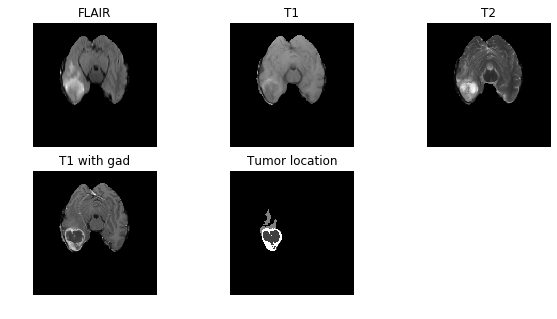

In [29]:
brainslice=50 #z axis how far looking down, can range from 0-155
plt.figure(figsize=(10,5))
plt.title("Top-down view")
#show flair
plt.subplot(2, 3, 1).set_axis_off()
plt.title("FLAIR")
plt.imshow(data_flair[:,:,brainslice].T, cmap='gray', origin='lower')
#show T1
plt.subplot(2,3,2).set_axis_off()
plt.title("T1")
plt.imshow(data_T1[:,:,brainslice].T, cmap='gray', origin='lower')
#show T2
plt.subplot(2,3,3).set_axis_off()
plt.title("T2")
plt.imshow(data_T2[:,:,brainslice].T, cmap='gray', origin='lower')
#show T1 with gad
plt.subplot(2,3,4).set_axis_off()
plt.title("T1 with gad")
plt.imshow(data_T1g[:,:,brainslice].T, cmap='gray', origin='lower')
#show segmented tumore
plt.subplot(2,3,5).set_axis_off()
plt.title("Tumor location")
plt.imshow(data_seg[:,:,brainslice].T, cmap='gray', origin='lower')
plt.show()

Slice from front

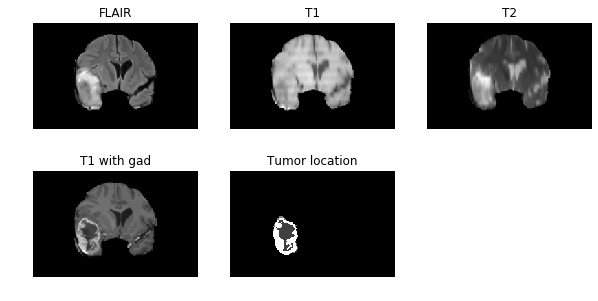

In [30]:
brainslice=100 #z axis how far looking down, can range from 0-155
plt.figure(figsize=(10,5))
plt.title("Top-down view")
#show flair
plt.subplot(2, 3, 1).set_axis_off()
plt.title("FLAIR")
plt.imshow(data_flair[:,brainslice,:].T, cmap='gray', origin='lower')
#show T1
plt.subplot(2,3,2).set_axis_off()
plt.title("T1")
plt.imshow(data_T1[:,brainslice,:].T, cmap='gray', origin='lower')
#show T2
plt.subplot(2,3,3).set_axis_off()
plt.title("T2")
plt.imshow(data_T2[:,brainslice,:].T, cmap='gray', origin='lower')
#show T1 with gad
plt.subplot(2,3,4).set_axis_off()
plt.title("T1 with gad")
plt.imshow(data_T1g[:,brainslice,:].T, cmap='gray', origin='lower')
#show segmented tumore
plt.subplot(2,3,5).set_axis_off()
plt.title("Tumor location")
plt.imshow(data_seg[:,brainslice,:].T, cmap='gray', origin='lower')
plt.show()

Slice from Side

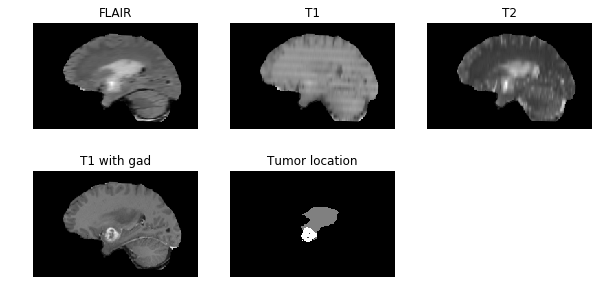

In [28]:
brainslice=100 #z axis how far looking down, can range from 0-155
plt.figure(figsize=(10,5))
plt.title("Top-down view")
#show flair
plt.subplot(2, 3, 1).set_axis_off()
plt.title("FLAIR")
plt.imshow(data_flair[brainslice,:,:].T, cmap='gray', origin='lower')
#show T1
plt.subplot(2,3,2).set_axis_off()
plt.title("T1")
plt.imshow(data_T1[brainslice,:,:].T, cmap='gray', origin='lower')
#show T2
plt.subplot(2,3,3).set_axis_off()
plt.title("T2")
plt.imshow(data_T2[brainslice,:,:].T, cmap='gray', origin='lower')
#show T1 with gad
plt.subplot(2,3,4).set_axis_off()
plt.title("T1 with gad")
plt.imshow(data_T1g[brainslice,:,:].T, cmap='gray', origin='lower')
#show segmented tumore
plt.subplot(2,3,5).set_axis_off()
plt.title("Tumor location")
plt.imshow(data_seg[brainslice,:,:].T, cmap='gray', origin='lower')
plt.show()

## Notes: T1 seems to have "streaky" noise, would need fourier-based noise removal to rectify

# Extracting cooridnates for tumors

In [69]:
np.argwhere(data_seg!=0)

array([[ 57, 123,  52],
       [ 57, 124,  52],
       [ 57, 124,  54],
       ...,
       [111, 122,  71],
       [111, 123,  71],
       [111, 124,  71]])

Extract coordinates of high grade tumors:

In [70]:
np.argwhere(data_seg==4)

array([[ 60, 111,  52],
       [ 60, 111,  54],
       [ 60, 112,  52],
       ...,
       [102, 117,  66],
       [102, 118,  59],
       [102, 118,  60]])